In [1]:
pip install opencv-python numpy matplotlip 

Note: you may need to restart the kernel to use updated packages.


In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import glob
import math

In [16]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255 # <-- This line altered for grayscale.
    
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

    
def draw_lines(img, lines, color=[250,0 , 0], thickness=9):
    # If there are no lines to draw, exit.
        if lines is None:
            return
    # Make a copy of the original image.
        img = np.copy(img)
    # Create a blank image that matches the original in size.
        line_img = np.zeros(
            (
                img.shape[0],
                img.shape[1],
                3
            ),
            dtype=np.uint8,
        )
    # Loop over all lines and draw them on the blank image.
        for line in lines:
            for x1, y1, x2, y2 in line:
                pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
                cv2.polylines(line_img, [pts], True, (0,255,0))
                # cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
        # Merge the image with the lines onto the original.
        img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
        # Return the modified image.
        return img

def show_image(image, title="title", cmap_type="gray"):
    plt.imshow(image, cmap_type)
    plt.title(title)
#     plt.axis("off")
# prespective
def perspectiveTransform(srcPoints, dstPoints):
    M = cv2.getPerspectiveTransform(srcPoints, dstPoints)
    Minv = cv2.getPerspectiveTransform(dstPoints, srcPoints)
    return M, Minv

def warpPerspective(img, imgSize, M):
    return cv2.warpPerspective(img, M, imgSize, cv2.INTER_LINEAR)

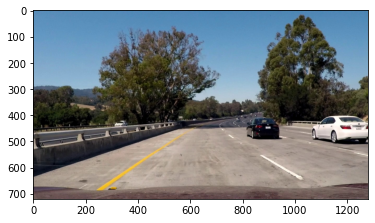

In [17]:
image = cv2.imread("test_image/120.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

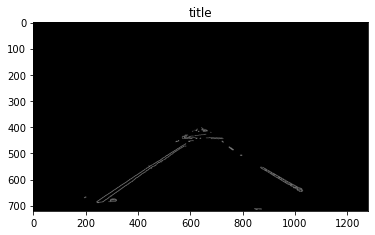

In [18]:
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),
    (width / 2,400),
    (width, height),
]

hls_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

gray_image = hls_image[:,:,2]

############################################canny##############################################
cannyed_image = cv2.Canny(gray_image,100,200, L2gradient = True)
(T, threshInv) = cv2.threshold(cannyed_image, 190, 255,cv2.THRESH_BINARY)
#############################################################################################

cropped_image = region_of_interest(
    threshInv,
    np.array([region_of_interest_vertices], np.int32)
)
show_image(cropped_image)


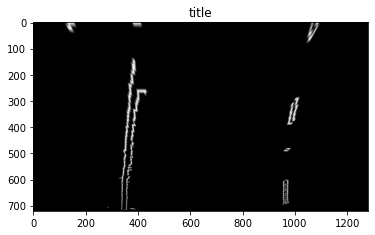

In [19]:
ysize = cropped_image.shape[0]
xsize = cropped_image.shape[1]

# undist = undistort(img, mtx, dist)

src = np.float32([
    (696,455),    
    (587,455), 
    (235,700),  
    (1075,700)
])

dst = np.float32([
    (xsize - 350, 0),
    (350, 0),
    (350, ysize),
    (xsize - 350, ysize)
])

M, Minv = perspectiveTransform(src, dst)

size = cropped_image.shape[1::-1]
warped_image = warpPerspective(cropped_image.astype(np.float32), size, M)

show_image(warped_image)
